In [1]:
import sys
sys.path.append("../")
sys.path.append("../..")

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14, 4)

In [2]:
# Input
start_time = pd.to_datetime("2021-03-01 00:00:00")
end_time = pd.to_datetime("2022-10-02 00:00:00")

durationList = ['Hour', 'Day', 'Week', 'Month','Year']
feature_cycle = 'Day'
feature_cycle_times = 1

modelName="som"
db_name = 'air_indoor_어린이집'
ms_name = "ICW0W2001082"
feature_list = ['in_noise']
feature_name = feature_list[0]
freq_min = 60
import datetime
timedelta_frequency_sec = datetime.timedelta(minutes= freq_min)

# 3. Nan Processing Parameter
# 3-1. NanLImitProcessingInfo = {'type':'ratio', 'ConsecutiveNanLimit':0.05, 'totalNaNLimit':1} # seconds
# 3-2. NanLImitProcessingInfo = {'type':'time', 'ConsecutiveNanLimit':1*60*60, 'totalNaNLimit':5*60*60} #seconds
# 3-3.
#NanInfoForCleanData = {'type':'num', 'ConsecutiveNanLimit':2, 'totalNaNLimit':20} #27
#NanInfoForCleanData = {'type':'num', 'ConsecutiveNanLimit':1000, 'totalNaNLimit':100000}
NanInfoForCleanData = {'type':'num', 'ConsecutiveNanLimit':1, 'totalNaNLimit':3} #66

In [3]:
from clust.ingestion.influx import influx_Client_v2 as influx_Client, influx_Module
from setting import influx_setting_KETI as ins
db_client = influx_Client.influxClient(ins.CLUSTDataServer2)

In [6]:
from clust.quality.NaN import clean_feature_data
CMS = clean_feature_data.CleanFeatureData(feature_list, timedelta_frequency_sec)

In [7]:
output_data = db_client.get_data_by_time(start_time, end_time, db_name, ms_name)

In [8]:
output_data.tail()

,in_co2,in_humi,in_noise,in_pm01,in_pm10,in_pm25,in_temp,in_voc
time,,,,,,,,
2022-04-30 18:08:00+00:00,2500.0,35.0,62.0,4.0,5.0,4.0,22.0,428.0
2022-04-30 18:09:00+00:00,2500.0,35.0,63.0,4.0,4.0,4.0,22.0,428.0
2022-04-30 18:10:00+00:00,2500.0,35.0,61.0,5.0,5.0,5.0,22.0,424.0
2022-04-30 18:11:00+00:00,2500.0,35.0,62.0,5.0,5.0,5.0,22.0,441.0
2022-04-30 18:12:00+00:00,2500.0,35.0,63.0,5.0,5.0,5.0,22.0,458.0


In [9]:
from clust.transformation.dataByCycle import cycle_Module
dataSet = cycle_Module.getCycleSelectDataSet(output_data, feature_cycle, feature_cycle_times)

In [10]:
dataSet

{'2021-03-01 00:00:00':                            in_co2  in_humi  in_noise  in_pm01  in_pm10  \
 time                                                                     
 2021-03-01 00:00:00+00:00   436.0     25.0      73.0     19.0     20.0   
 2021-03-01 00:01:00+00:00   462.0     25.0      74.0     18.0     20.0   
 2021-03-01 00:02:00+00:00   491.0     25.0      74.0     19.0     20.0   
 2021-03-01 00:03:00+00:00   415.0     25.0      74.0     20.0     20.0   
 2021-03-01 00:04:00+00:00   421.0     25.0      74.0     19.0     20.0   
 ...                           ...      ...       ...      ...      ...   
 2021-03-01 23:55:00+00:00   424.0     35.0      72.0      1.0      1.0   
 2021-03-01 23:56:00+00:00   425.0     35.0      74.0      1.0      1.0   
 2021-03-01 23:57:00+00:00   410.0     35.0      73.0      0.0      0.0   
 2021-03-01 23:58:00+00:00   436.0     35.0      74.0      1.0      1.0   
 2021-03-01 23:59:00+00:00   414.0     35.0      74.0      0.0      0.0   
 


In [11]:
dataSet1, dataSetName, NaNRemovedDataSet, imputedDatasetName, ImputedDataSet  = CMS.getMultipleCleanDataSetsByFeature(dataSet, NanInfoForCleanData)

======= 2021-03-01 00:00:00 =======
======= 2021-03-02 00:00:00 =======
======= 2021-03-03 00:00:00 =======
======= 2021-03-04 00:00:00 =======
======= 2021-03-05 00:00:00 =======
======= 2021-03-06 00:00:00 =======
======= 2021-03-07 00:00:00 =======
======= 2021-03-08 00:00:00 =======
======= 2021-03-09 00:00:00 =======
======= 2021-03-10 00:00:00 =======
======= 2021-03-11 00:00:00 =======
======= 2021-03-12 00:00:00 =======
======= 2021-03-13 00:00:00 =======
======= 2021-03-14 00:00:00 =======
======= 2021-03-15 00:00:00 =======
======= 2021-03-16 00:00:00 =======
======= 2021-03-17 00:00:00 =======
======= 2021-03-18 00:00:00 =======
======= 2021-03-19 00:00:00 =======
======= 2021-03-20 00:00:00 =======
======= 2021-03-21 00:00:00 =======
======= 2021-03-22 00:00:00 =======
======= 2021-03-23 00:00:00 =======
======= 2021-03-24 00:00:00 =======
======= 2021-03-25 00:00:00 =======
======= 2021-03-26 00:00:00 =======
======= 2021-03-27 00:00:00 =======
======= 2021-03-28 00:00:00 

======= 2021-10-28 00:00:00 =======
======= 2021-10-29 00:00:00 =======
======= 2021-10-30 00:00:00 =======
======= 2021-10-31 00:00:00 =======
======= 2021-11-01 00:00:00 =======
======= 2021-11-02 00:00:00 =======
======= 2021-11-03 00:00:00 =======
======= 2021-11-04 00:00:00 =======
======= 2021-11-05 00:00:00 =======
======= 2021-11-06 00:00:00 =======
======= 2021-11-07 00:00:00 =======
======= 2021-11-08 00:00:00 =======
======= 2021-11-09 00:00:00 =======
======= 2021-11-10 00:00:00 =======
======= 2021-11-11 00:00:00 =======
======= 2021-11-12 00:00:00 =======
======= 2021-11-13 00:00:00 =======
======= 2021-11-14 00:00:00 =======
======= 2021-11-15 00:00:00 =======
======= 2021-11-16 00:00:00 =======
======= 2021-11-17 00:00:00 =======
======= 2021-11-18 00:00:00 =======
======= 2021-11-19 00:00:00 =======
======= 2021-11-20 00:00:00 =======
======= 2021-11-21 00:00:00 =======
======= 2021-11-22 00:00:00 =======
======= 2021-11-23 00:00:00 =======
======= 2021-11-24 00:00:00 

In [12]:
dataSet1

{'in_noise': [                            in_noise
  time                                
  2021-03-01 00:00:00+00:00  73.883333
  2021-03-01 01:00:00+00:00  73.933333
  2021-03-01 02:00:00+00:00  73.833333
  2021-03-01 03:00:00+00:00  73.816667
  2021-03-01 04:00:00+00:00  73.900000
  2021-03-01 05:00:00+00:00  73.933333
  2021-03-01 06:00:00+00:00  73.950000
  2021-03-01 07:00:00+00:00  73.983333
  2021-03-01 08:00:00+00:00  74.033333
  2021-03-01 09:00:00+00:00  73.933333
  2021-03-01 10:00:00+00:00  74.066667
  2021-03-01 11:00:00+00:00  74.100000
  2021-03-01 12:00:00+00:00  74.000000
  2021-03-01 13:00:00+00:00  74.000000
  2021-03-01 14:00:00+00:00  73.900000
  2021-03-01 15:00:00+00:00  73.883333
  2021-03-01 16:00:00+00:00  73.850000
  2021-03-01 17:00:00+00:00  73.933333
  2021-03-01 18:00:00+00:00  73.733333
  2021-03-01 19:00:00+00:00  73.783333
  2021-03-01 20:00:00+00:00  73.600000
  2021-03-01 21:00:00+00:00  73.450000
  2021-03-01 22:00:00+00:00  73.450000
  2021-03-01 

In [13]:
len(dataSetName[feature_name]), len(imputedDatasetName[feature_name])

(279, 74)

In [14]:
feature_dataset= ImputedDataSet[feature_name]
feature_datasetName = imputedDatasetName[feature_name]

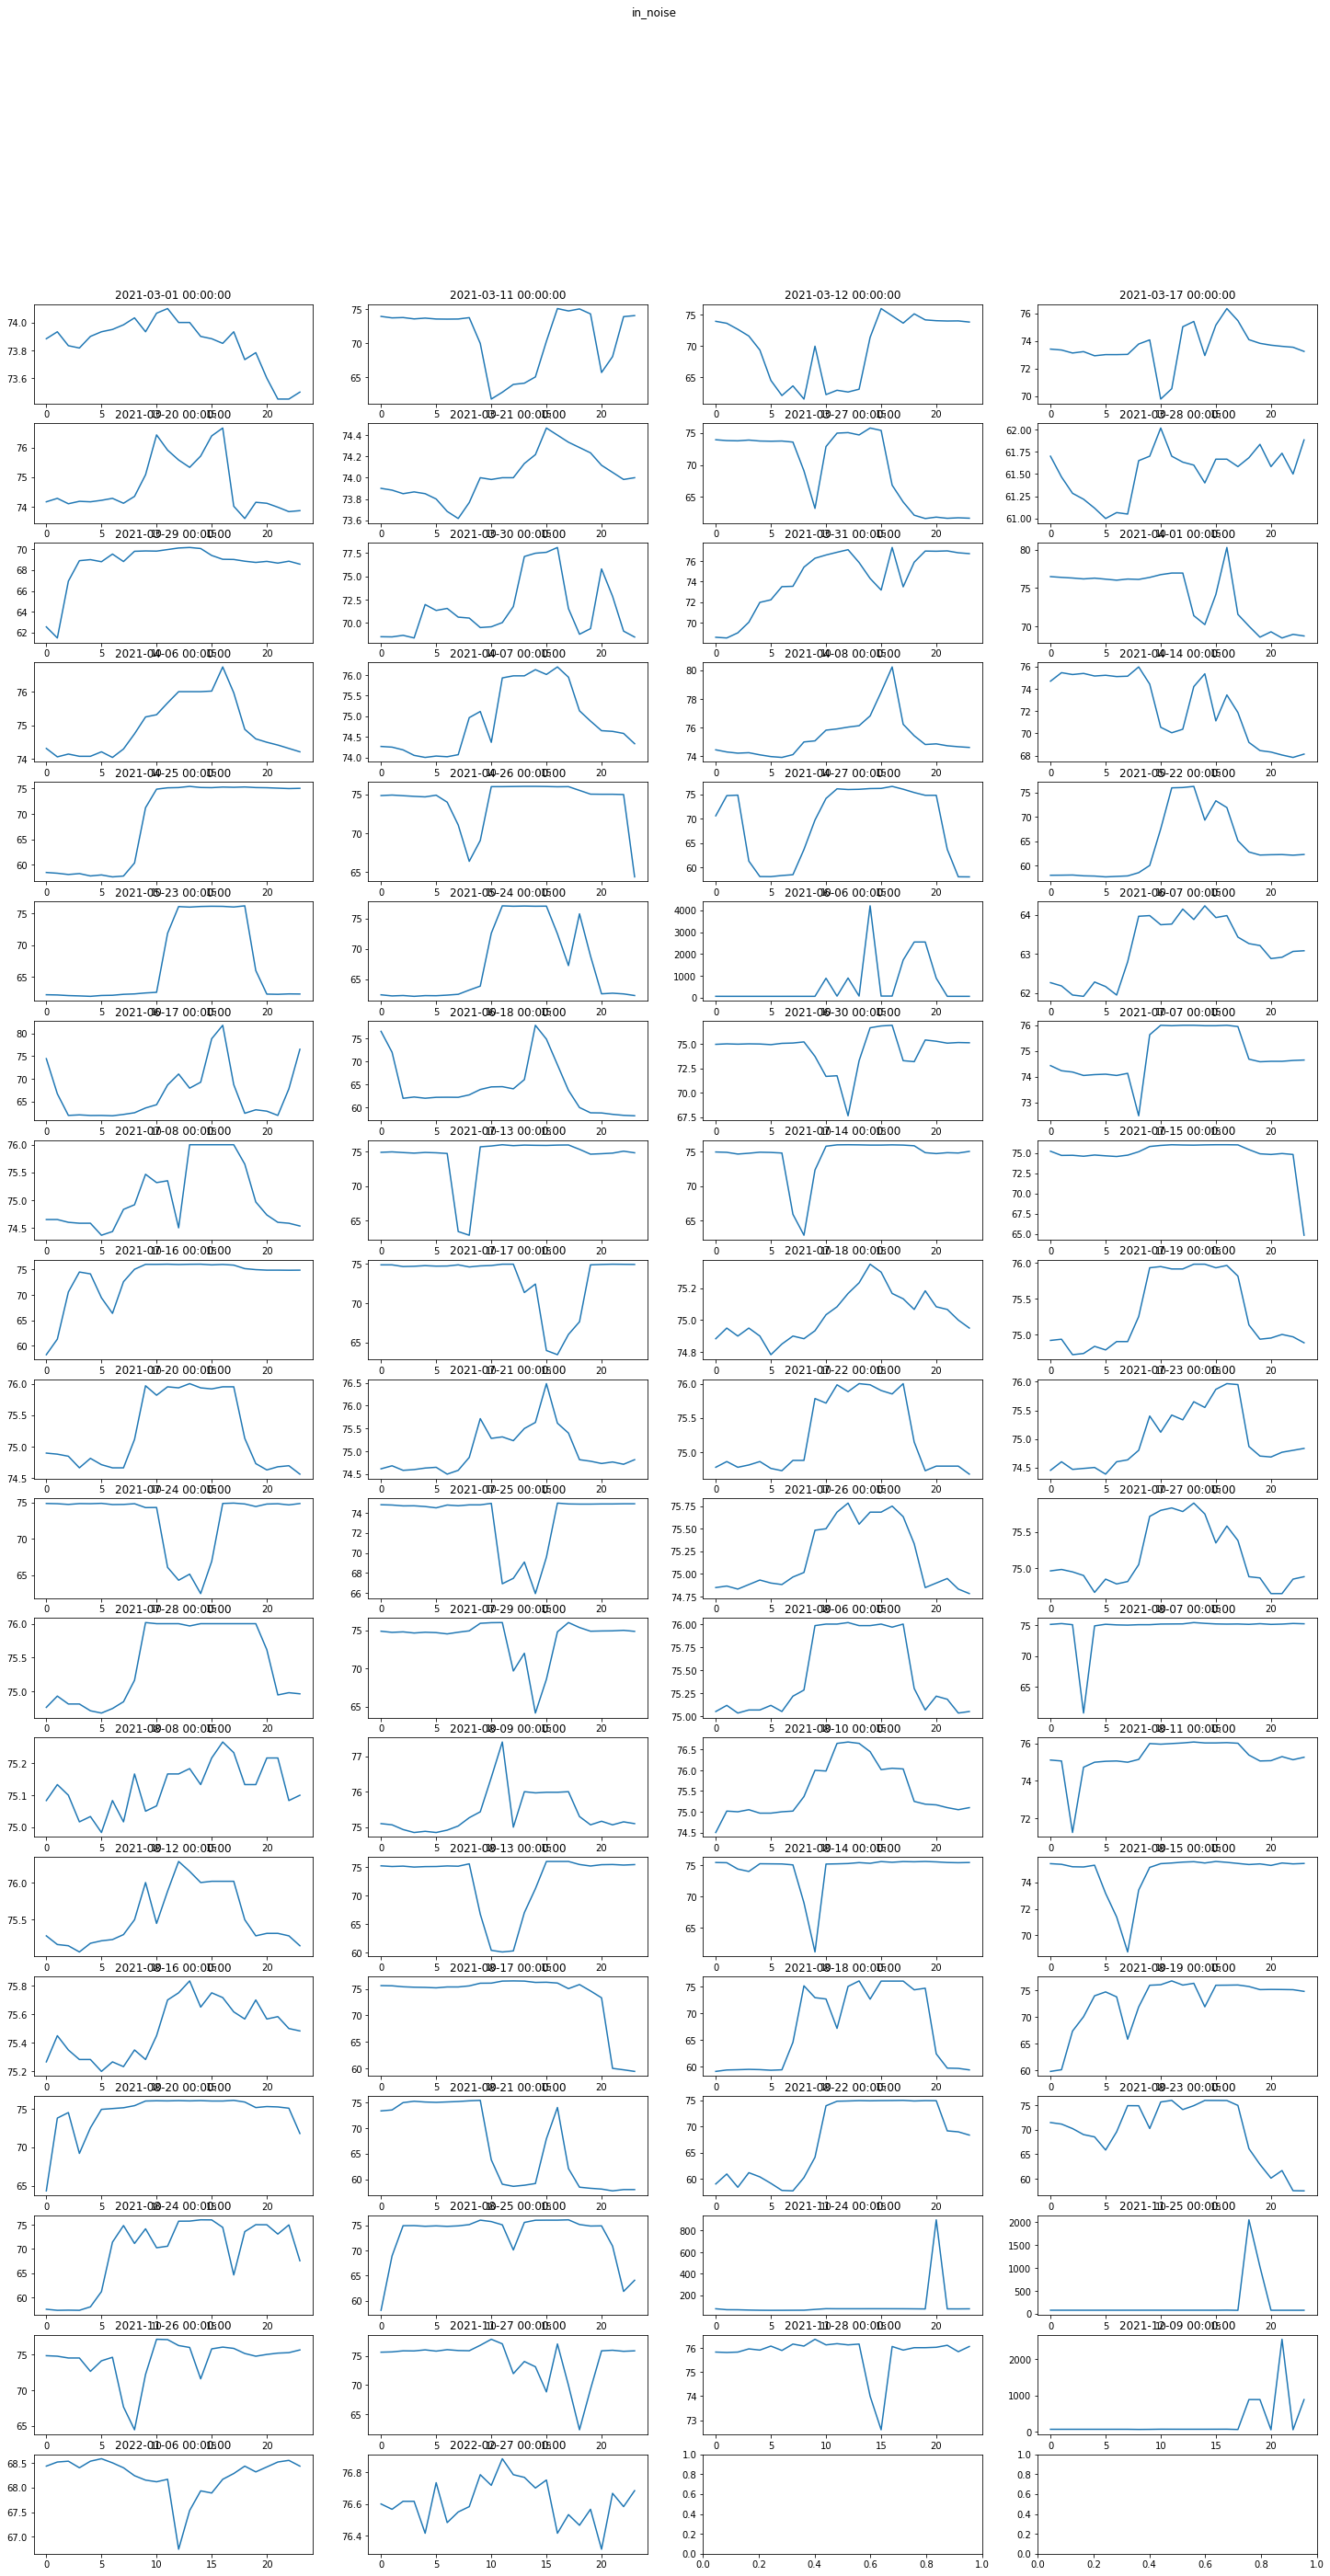

In [15]:
from clust.ML.clustering import plot_seriesDataSet
fig_width_num = 4
fig_width = 25
fig_height = 45
plt = plot_seriesDataSet.groupSeriesFig(fig_width, fig_height, feature_dataset, feature_datasetName, feature_name, fig_width_num )
plt.show()

## Analysis를 위한 전처리 및 분석 수행

## Clustering 
### Clustering 1 - SOM

dict_keys([(2, 2), (0, 2), (1, 1), (0, 0), (0, 1), (1, 0), (1, 2), (2, 0), (2, 1)])


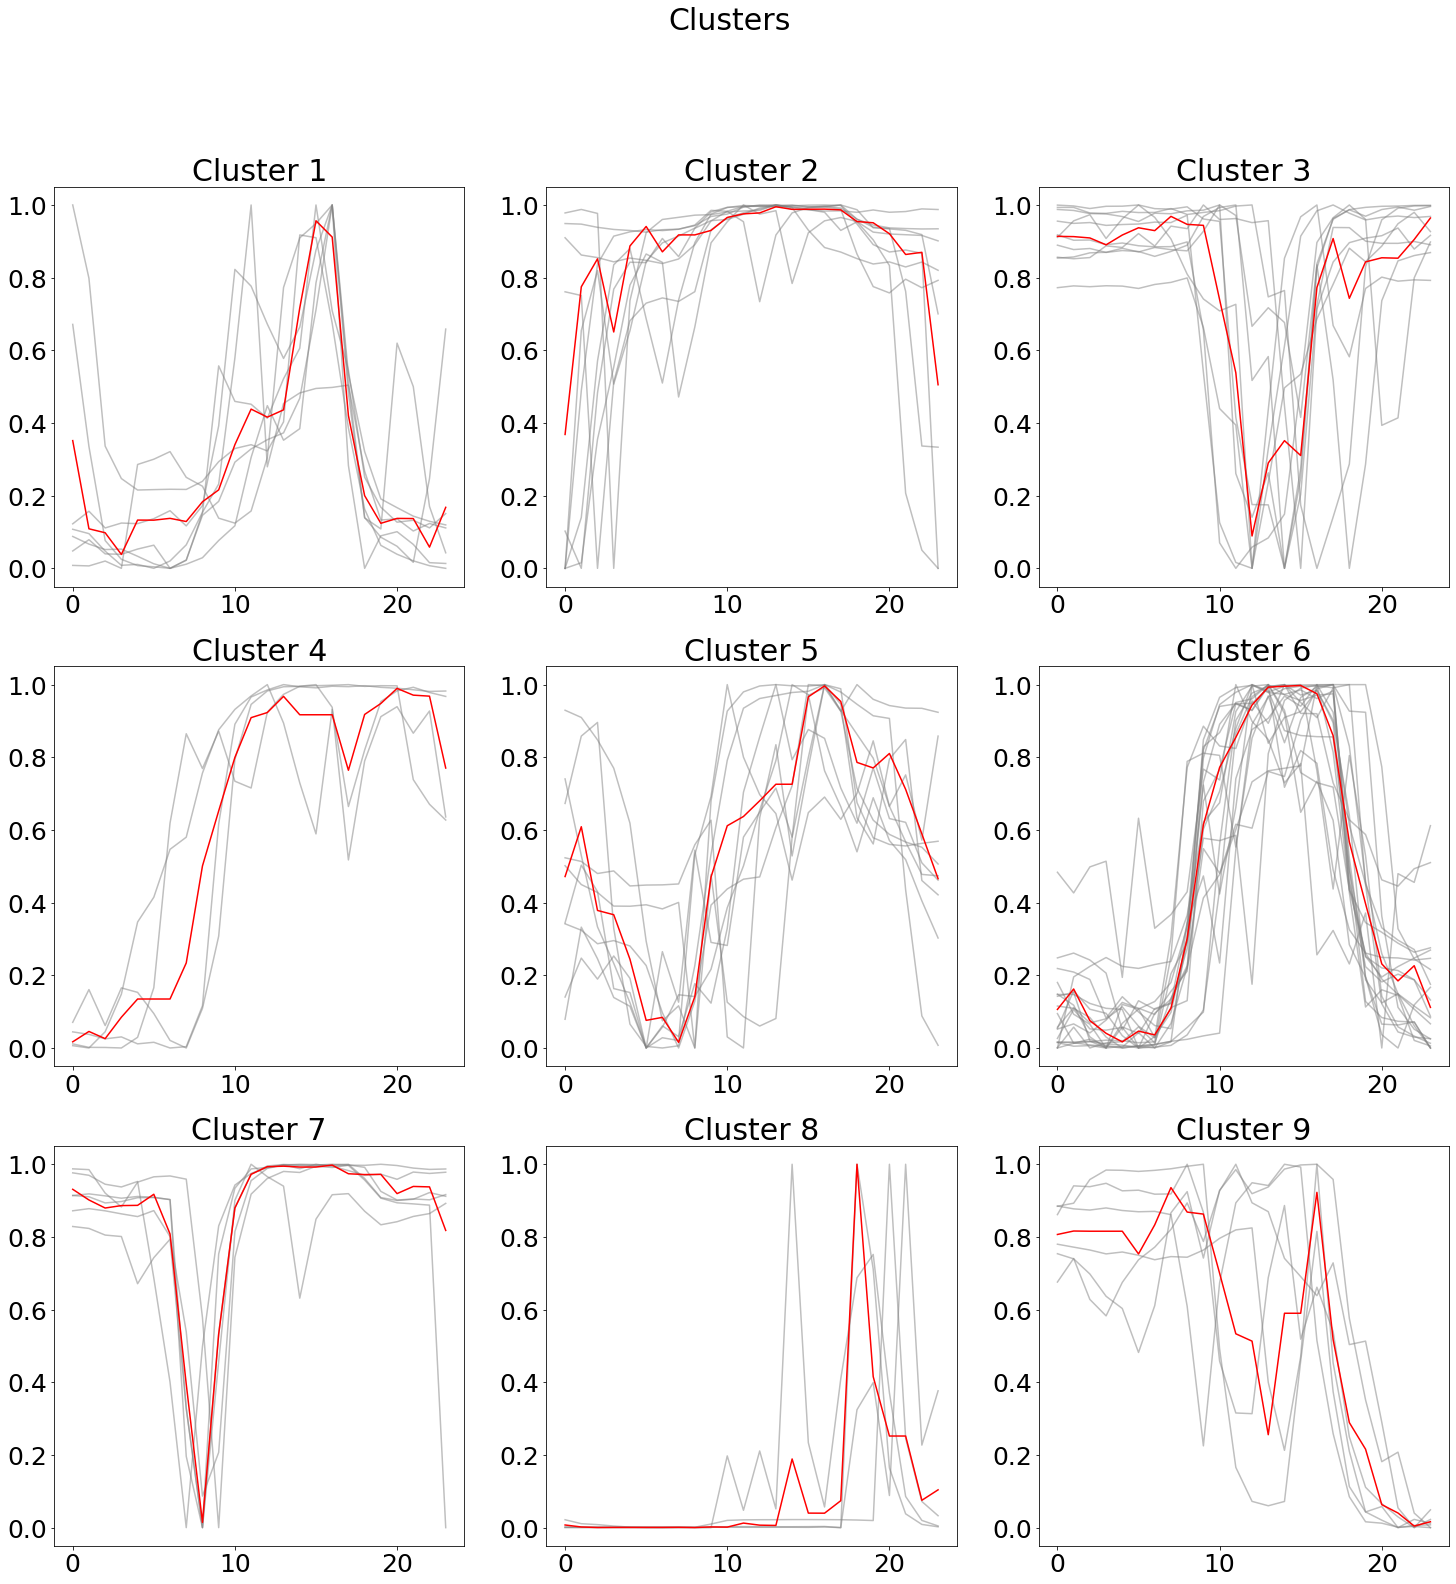

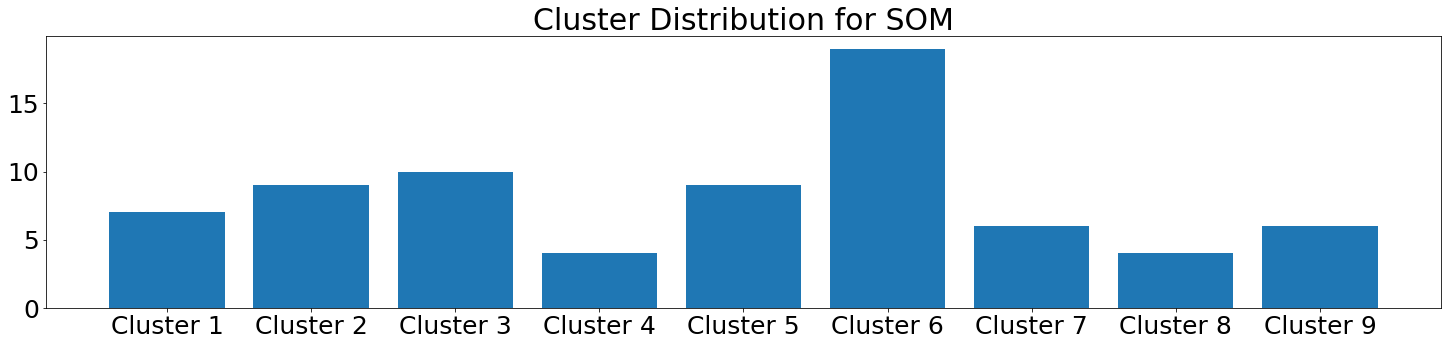

In [16]:
from clust.ML.clustering import interface

model="som"
feature_dataset= ImputedDataSet[feature_name]
feature_datasetName = imputedDatasetName[feature_name]
result, fig1, fig2 = interface.clusteringByMethod(feature_dataset, feature_datasetName, model)

In [17]:
result

{'2021-03-01 00:00:00': '9',
 '2021-03-11 00:00:00': '3',
 '2021-03-12 00:00:00': '5',
 '2021-03-17 00:00:00': '5',
 '2021-03-20 00:00:00': '1',
 '2021-03-21 00:00:00': '5',
 '2021-03-27 00:00:00': '9',
 '2021-03-28 00:00:00': '5',
 '2021-03-29 00:00:00': '2',
 '2021-03-30 00:00:00': '1',
 '2021-03-31 00:00:00': '4',
 '2021-04-01 00:00:00': '9',
 '2021-04-06 00:00:00': '6',
 '2021-04-07 00:00:00': '6',
 '2021-04-08 00:00:00': '1',
 '2021-04-14 00:00:00': '9',
 '2021-04-25 00:00:00': '4',
 '2021-04-26 00:00:00': '7',
 '2021-04-27 00:00:00': '5',
 '2021-05-22 00:00:00': '6',
 '2021-05-23 00:00:00': '6',
 '2021-05-24 00:00:00': '6',
 '2021-06-06 00:00:00': '8',
 '2021-06-07 00:00:00': '6',
 '2021-06-17 00:00:00': '1',
 '2021-06-18 00:00:00': '1',
 '2021-06-30 00:00:00': '3',
 '2021-07-07 00:00:00': '5',
 '2021-07-08 00:00:00': '6',
 '2021-07-13 00:00:00': '7',
 '2021-07-14 00:00:00': '7',
 '2021-07-15 00:00:00': '2',
 '2021-07-16 00:00:00': '2',
 '2021-07-17 00:00:00': '3',
 '2021-07-18 0